# Rollerblade-Rental-System

# Import libraries

In [ ]:
from datetime import datetime, timedelta
import uuid

# Utility methods

## Generate unique id

In [ ]:
def generate_unique_id():
  unique_id = str(uuid.uuid4().fields[-1])[:6]
  return unique_id

## Search object (Binary-Search)

In [ ]:
def search_items(items, target, attribute):
    left = 0
    right = len(items) - 1

    while left <= right:
        mid = (left + right) // 2
        comparison = getattr(items[mid], attribute)

        if comparison == target:
            return items[mid]
        elif comparison < target:
            left = mid + 1
        else:
            right = mid - 1

    return None

## Sort objects (Quick-Sort)

In [ ]:
def sort_items(items, target_attr, ascending=True):
  if len(items) <= 1:
      return items

  pivot = items[len(items) // 2]
  left = [item for item in items if getattr(item, target_attr) < getattr(pivot, target_attr)]
  middle = [item for item in items if getattr(item, target_attr) == getattr(pivot, target_attr)]
  right = [item for item in items if getattr(item, target_attr) > getattr(pivot, target_attr)]

  if ascending:
      return sort_items(left, target_attr, ascending) + middle + sort_items(right, target_attr, ascending)
  else:
      return sort_items(right, target_attr, ascending) + middle + sort_items(left, target_attr, ascending)

# Rollerblade class

## Class definition

Attribute details
```
prod_id   product id
brand     rollerblade brand name
model     rollerblade model name
rprice    rental price per hour
sizes     all available sizes
color     rollerblade color
rating    customer rating
```

In [ ]:
# Rollerblade class
class Rollerblade:
  # Constructor
  def __init__(self, prod_id, brand, model, rprice, sizes, color, rating):
    self.prod_id = prod_id
    self.brand = brand
    self.model = model
    self.rprice = rprice
    self.sizes = sizes
    self.color = color
    self.rating = rating

  # Display rollerblade details
  def __str__(self):
    return f"Product Id: {self.prod_id}\n\
            Brand: {self.brand}\n\
            Model: {self.model}\n\
            Rental Price: {self.rprice} USD/hour\n\
            Available Sizes: {self.sizes}\n\
            Color: {self.color}\n\
            Rating: {self.rating}"

  # Edit rollerblade details
  def edit_rollerblade(self, attribute, new_value):
    if hasattr(self, attribute):
      setattr(self, attribute, new_value)
      print(f"\n{attribute} has been updated.")
    else:
      print("\nInvalid attribute! Please provide a valid attribute to edit.")

rollerblades = []

## Rollerblade references
```
Product Id:       R-376639
Brand:            Rollerblade
Model:            MACROBLADE 80 ABT
Rental Price:     10 per hour
Available Sizes:  [6,6.5,7,7.5,8,8.5,9,9.5,10,10,10.5,11,11.5,12,12.5,13,13.5]
Color:            Silver/Neon Yellow
Rating:           5.0

["Rollerblade", "MACROBLADE 80 ABT", 15, [6,6.5,7,7.5,8,8.5,9,9.5,10,10,10.5,11,11.5,12,12.5], "Silver/Neon Yellow", 5.0]
["Rollerblade", "ADVANTAGE PRO XT", 15, [7,8,9,10,11,12,13], "Black/Red", 5.0]
["Rollerblade", "ZETRABLADE", 13, [6,10,11], "Black/Silver", 4.7]
["Rollerblade", "RB CRUISER", 13, [5,6,7,8,10,11,12], "Black/Neon Yellow", 3.8]
["Rollerblade", "FORMULA 100", 10, [7,8,9,12], "Black/Red", 4.0]
["PowerSlide", "STELLAR 110", 10, [7,8,9,10,11,12,13], "Black/Red", 4.5]
["PowerSlide", "NEXT PRO BLACK 80", 15, [6,10,11], "Black/White", 5.0]
["PowerSlide", "PHUZION RADON BLACK 80", 13, [7,8,9,10,11,12,13], "Black", 4.5]
["Roces", "M12 LO UFS TEAM JUNO", 15, [6,6.5,7,7.5,8,8.5,9,9.5,10,10,10.5,11,11.5,12,12.5,13,13.5], "Orange/Grey", 5.0]
["Roces", "THREAD SALT-N-PEPA", 15, [7,8,9,10,11,12,13], "Grey/White", 5.0]

https://www.rollerblade.com/
https://www.powerslide.com/
https://www.roces.com/
```

## Insert/Display rollerblade details

In [ ]:
# Quick entry for first few rollerblades
products = [["Rollerblade", "MACROBLADE 80 ABT", 15, [6,6.5,7,7.5,8,8.5,9,9.5,10,10,10.5,11,11.5,12,12.5], "Silver/Neon Yellow", 5.0],
            ["Rollerblade", "ADVANTAGE PRO XT", 15, [7,8,9,10,11,12,13], "Black/Red", 5.0],
            ["Rollerblade", "ZETRABLADE", 13, [6,10,11], "Black/Silver", 4.7],
            ["Rollerblade", "RB CRUISER", 13, [5,6,7,8,10,11,12], "Black/Neon Yellow", 3.8],
            ["PowerSlide", "STELLAR 110", 10, [7,8,9,10,11,12,13], "Black/Red", 4.5],
            ["PowerSlide", "NEXT PRO BLACK 80", 15, [6,10,11], "Black/White", 5.0],
            ["Roces", "M12 LO UFS TEAM JUNO", 15, [6,6.5,7,7.5,8,8.5,9,9.5,10,10,10.5,11,11.5,12,12.5,13,13.5], "Orange/Grey", 5.0]]

for i in range(len(products)):
  rollerblade = Rollerblade(prod_id=f"P-{generate_unique_id()}", brand=str(products[i][0]), model=str(products[i][1]), rprice=float(products[i][2]), sizes=products[i][3], color=str(products[i][4]), rating=float(products[i][5]))
  rollerblades.append(rollerblade)

In [ ]:
# Loop to take user inputs and store more rollerblades
while True:
  print("\n[INSERT MODE]\nENTER ROLLERBLADE DETAILS ============================== \n")
  prod_id = f"P-{generate_unique_id()}"
  brand = input("Brand: ")
  model = input("Model: ")
  rprice = float(input("Rental Price: "))
  sizes = [float(x) for x in input("Enter all available sizes (csv): ").split(',')]
  color = input("Color: ")
  rating = float(input("Rating: "))

  rollerblade = Rollerblade(prod_id, brand, model, rprice, sizes, color, rating)
  rollerblades.append(rollerblade)

  choice = input("\nDo you want to enter another rollerblade? (y/n): ").lower()
  if choice != "y":
    # Display rollerblades
    print("\nROLLERBLADES AVAILABLE ============================== \n")
    for i, rollerblade in enumerate(rollerblades):
      print(f"\nProduct {i+1} >>--")
      print(rollerblade)
    break


[INSERT MODE]
ENTER ROLLERBLADE DETAILS ============================== 

Brand: Rollerblade
Model: FORMULA 100
Rental Price: 10
Enter all available sizes (csv): 7,8,9,12
Color: Black/Red
Rating: 4

Do you want to enter another rollerblade? (y/n): y

[INSERT MODE]
ENTER ROLLERBLADE DETAILS ============================== 

Brand: PowerSlide
Model: PHUZION RADON BLACK 80
Rental Price: 13
Enter all available sizes (csv): 7,8,9,10,11,12,13
Color: Black
Rating: 4.5

Do you want to enter another rollerblade? (y/n): y

[INSERT MODE]
ENTER ROLLERBLADE DETAILS ============================== 

Brand: Roces
Model: THREAD SALT-N-PEPA
Rental Price: 15
Enter all available sizes (csv): 7,8,9,10,11,12,13
Color: Grey/White
Rating: 5

Do you want to enter another rollerblade? (y/n): n

ROLLERBLADES AVAILABLE ============================== 


Product 1 >>--
Product Id: P-167273
            Brand: Rollerblade
            Model: MACROBLADE 80 ABT
            Rental Price: 15.0 USD/hour
            Availabl

## Edit/Display rollerblade details

In [ ]:
# Loop to take user inputs and edit rollerblade details
while True:
  try:
    print("\n[EDIT MODE]\nENTER ROLLERBLADE DETAILS ============================== \n")
    edit_prod_id = "P-" + input("Product Id: P-")

    # Search rollerblade
    found_rollerblade = search_items(rollerblades, edit_prod_id, 'prod_id')

    if found_rollerblade:
      print("\nROLLERBLADE DETAILS: \n")
      print(found_rollerblade)
      edit_attr_no = int(input("\nSpecification (edit): 1. Brand | 2. Model | 3. Rental Price | 4. Available Sizes | 5. Color: "))
      if(edit_attr_no == 1):
        edit_attr = 'brand'
        edit_attr_val = input("New Brand: ")
      elif(edit_attr_no == 2):
        edit_attr = 'model'
        edit_attr_val = input("New Model: ")
      elif(edit_attr_no == 3):
        edit_attr = 'rprice'
        edit_attr_val = float(input("New Rental Price: "))
      elif(edit_attr_no == 4):
        edit_attr = 'sizes'
        edit_attr_val = [float(x) for x in input("Enter new available sizes (csv): ").split(',')]
      elif(edit_attr_no == 5):
        edit_attr = 'color'
        edit_attr_val = input("New Color: ")

      found_rollerblade.edit_rollerblade(edit_attr, edit_attr_val)
    else:
      print("Rollerblade not found!")

  except ValueError as e:
    print("Error:", e)

  choice = input("\nDo you want to edit another rollerblade? (y/n): ").lower()
  if choice != "y":
    # Display rollerblades
    print("\nROLLERBLADES AVAILABLE ============================== \n")
    for i, rollerblade in enumerate(rollerblades):
      print(f"\nProduct {i+1} >>--")
      print(rollerblade)
    break


[EDIT MODE]
ENTER ROLLERBLADE DETAILS ============================== 

Product Id: P-167273

ROLLERBLADE DETAILS: 

Product Id: P-167273
            Brand: Rollerblade
            Model: MACROBLADE 80 ABT
            Rental Price: 25.0 USD/hour
            Available Sizes: [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10, 10.5, 11, 11.5, 12, 12.5]
            Color: Silver/Neon Yellow
            Rating: 5.0

Specification (edit): 1. Brand | 2. Model | 3. Rental Price | 4. Available Sizes | 5. Color: 3
New Rental Price: 20

rprice has been updated.

Do you want to edit another rollerblade? (y/n): n

ROLLERBLADES AVAILABLE ============================== 


Product 1 >>--
Product Id: P-167273
            Brand: Rollerblade
            Model: MACROBLADE 80 ABT
            Rental Price: 20.0 USD/hour
            Available Sizes: [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10, 10.5, 11, 11.5, 12, 12.5]
            Color: Silver/Neon Yellow
            Rating: 5.0

Product 2 >>--
Product Id: P-230246
     

## Search a rollerblade

In [ ]:
# Search rollerblade
print("\n[SEARCH MODE]\nENTER ROLLERBLADE DETAILS ============================== \n")
search_prod_id = "P-" + input("Product Id: P-")
found_rollerblade = search_items(rollerblades, search_prod_id, 'prod_id')

if found_rollerblade:
  print("\nROLLERBLADE DETAILS: \n")
  print(found_rollerblade)
else:
  print(f"Rollerblade with product id {search_prod_id} not found!")


[SEARCH MODE]
ENTER ROLLERBLADE DETAILS ============================== 

Product Id: P-167273

ROLLERBLADE DETAILS: 

Product Id: P-167273
            Brand: Rollerblade
            Model: MACROBLADE 80 ABT
            Rental Price: 20.0 USD/hour
            Available Sizes: [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10, 10.5, 11, 11.5, 12, 12.5]
            Color: Silver/Neon Yellow
            Rating: 5.0


## Sort rollerblades

In [ ]:
# Sort rolleblades
print("\n[SORT MODE]\nENTER ROLLERBLADE DETAILS ============================== \n")
sort_attr_no = int(input("\nSort Attribute: 1. Brand | 2. Model | 3. Rental Price | 4. Rating: "))
sort_type_no = int(input("\nSort Type: 1. Ascending | 2. Descending: "))

# Sort attributes
if(sort_attr_no == 1):
  sort_attr = 'brand'
elif(sort_attr_no == 2):
  sort_attr = 'model'
elif(sort_attr_no == 3):
  sort_attr = 'rprice'
elif(sort_attr_no == 4):
  sort_attr = 'rating'

# Sort type
if(sort_type_no == 1):
  asc = True
else:
  asc = False

# Quick sort
rollerblades = sort_items(rollerblades, sort_attr, asc)

# Display rollerblades
print("\nROLLERBLADES AVAILABLE ============================== \n")
for i, rollerblade in enumerate(rollerblades):
  print(f"\nProduct {i+1} >>--")
  print(rollerblade)


[SORT MODE]
ENTER ROLLERBLADE DETAILS ============================== 


Sort Attribute: 1. Brand | 2. Model | 3. Rental Price | 4. Rating: 4

Sort Type: 1. Ascending | 2. Descending: 2

ROLLERBLADES AVAILABLE ============================== 


Product 1 >>--
Product Id: P-167273
            Brand: Rollerblade
            Model: MACROBLADE 80 ABT
            Rental Price: 20.0 USD/hour
            Available Sizes: [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10, 10.5, 11, 11.5, 12, 12.5]
            Color: Silver/Neon Yellow
            Rating: 5.0

Product 2 >>--
Product Id: P-230246
            Brand: Rollerblade
            Model: ADVANTAGE PRO XT
            Rental Price: 15.0 USD/hour
            Available Sizes: [7, 8, 9, 10, 11, 12, 13]
            Color: Black/Red
            Rating: 5.0

Product 3 >>--
Product Id: P-813743
            Brand: PowerSlide
            Model: NEXT PRO BLACK 80
            Rental Price: 15.0 USD/hour
            Available Sizes: [6, 10, 11]
            Color

## Delete a rollerblade

In [ ]:
# Delete rollerblade
print("\n[DELETE MODE]\nENTER ROLLERBLADE DETAILS ============================== \n")
del_prod_id = "P-" + input("Product Id: P-")

# Search rollerblade
found_rollerblade = search_items(rollerblades, del_prod_id, 'prod_id')

if found_rollerblade:
  print("\nROLLERBLADE DETAILS: \n")
  print(found_rollerblade)
  del_res = input("\nAre you sure, want to delete the rollerblade? (y/n): ")
  if(del_res == 'y'):
    rollerblades.remove(found_rollerblade)
    print(f"\nRollerblade with product id {del_prod_id} deleted successfully.")
  else:
    pass
else:
  print(f"\nRollerblade with product id {del_prod_id} not found!")

# Display rollerblades
print("\nROLLERBLADES AVAILABLE ============================== \n")
for i, rollerblade in enumerate(rollerblades):
  print(f"\nProduct {i+1} >>--")
  print(rollerblade)


[DELETE MODE]
ENTER ROLLERBLADE DETAILS ============================== 

Product Id: P-119827

ROLLERBLADE DETAILS: 

Product Id: P-119827
            Brand: Roces
            Model: THREAD SALT-N-PEPA
            Rental Price: 15.0 USD/hour
            Available Sizes: [7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
            Color: Grey/White
            Rating: 5.0

Are you sure, want to delete the rollerblade? (y/n): y

Rollerblade with product id P-119827 deleted successfully.

ROLLERBLADES AVAILABLE ============================== 


Product 1 >>--
Product Id: P-167273
            Brand: Rollerblade
            Model: MACROBLADE 80 ABT
            Rental Price: 20.0 USD/hour
            Available Sizes: [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10, 10.5, 11, 11.5, 12, 12.5]
            Color: Silver/Neon Yellow
            Rating: 5.0

Product 2 >>--
Product Id: P-230246
            Brand: Rollerblade
            Model: ADVANTAGE PRO XT
            Rental Price: 15.0 USD/hour
            Av

# Customer class

## Class definition

Attribute details
```
cust_id    customer id
fname      customer first name
lname      customer last name
age        customer age
email      customer email
phone      customer phone
```

In [ ]:
#Customer class
class Customer:
  # Constructor
  def __init__(self, cust_id, fname, lname, age, email, phone):
    self.cust_id = cust_id
    self.fname = fname
    self.lname = lname
    self.age = age
    self.email = email
    self.phone = phone

  # Display customer details
  def __str__(self):
    return f"Customer Id: {self.cust_id}\n\
            First Name: {self.fname}\n\
            Last Name: {self.lname}\n\
            Age: {self.age}\n\
            Email: {self.email}\n\
            Phone: {self.phone}"

  # Edit customer details
  def edit_customer(self, attribute, new_value):
    if hasattr(self, attribute):
      setattr(self, attribute, new_value)
      print(f"\n{attribute} has been updated.")
    else:
      print("\nInvalid attribute! Please provide a valid attribute to edit.")

customers = []

# Rental class

## Class definition

Attribute details
```
book_ref        booking reference number
customer        customer object
rollerblade     rollerblade object
start_datetime  start of rollerblade rental
end_datetime    end of rollerblade rental
rental_hours    rental hours
rental_price    total rental price
```

In [ ]:
# Rental class
class Rental:
  # Constructor
  def __init__(self, rent_ref, customer, rollerblade, start_datetime, end_datetime, rental_hours, rental_price):
    self.rent_ref = rent_ref
    self.customer = customer
    self.rollerblade = rollerblade
    self.start_datetime = start_datetime
    self.end_datetime = end_datetime
    self.rental_hours = rental_hours
    self.rental_price = rental_price

  # Display rental details
  def __str__(self):
    return f"Rental Reference No.: {self.rent_ref}\n\
            Rollerblade: Product Id - {self.rollerblade.prod_id}, Brand - {self.rollerblade.brand}, Model - {self.rollerblade.model}, Size - {self.rollerblade.sizes}, Color - {self.rollerblade.color}\n\
            Customer: First Name - {self.customer.fname}, Last Name - {self.customer.lname}, Age - {self.customer.age}, Email - {self.customer.email}, Phone - {self.customer.phone}\n\
            Start DateTime: {self.start_datetime}\n\
            End DateTime: {self.end_datetime}\n\
            Hours Rented: {self.rental_hours} hrs\n\
            Total Charged: ${self.rental_price}"

  # Edit rental details
  def edit_rental(self, new_rent_hours, new_rental_price, new_end_datetime):
    setattr(self, 'rental_hours', new_rent_hours)
    setattr(self, 'rental_price', new_rental_price)
    setattr(self, 'end_datetime', new_end_datetime)
    print(f"\nRental details has been updated.")

  # Return method
  def return_rollerblade(self, return_datetime):
    late_hours = int((return_datetime - datetime.strptime(self.end_datetime, '%Y-%m-%d %H:%M:%S')).total_seconds() / 3600)
    late_charge_per_hour = 5
    late_charge = round((max(0, late_hours) * late_charge_per_hour), 2)
    total_charge = round((self.rental_price + late_charge), 2)

    print(f"Rental Reference No.: {self.rent_ref} (Returned)\n\
            Rollerblade: Product Id - {self.rollerblade.prod_id}, Brand - {self.rollerblade.brand}, Model - {self.rollerblade.model}, Size - {self.rollerblade.sizes}, Color - {self.rollerblade.color}\n\
            Customer: First Name - {self.customer.fname}, Last Name - {self.customer.lname}, Age - {self.customer.age}, Email - {self.customer.email}, Phone - {self.customer.phone}\n\
            Start DateTime: {self.start_datetime}\n\
            End DateTime: {self.end_datetime}\n\
            Hours Rented: {self.rental_hours} hrs\n\
            Total Charged: ${self.rental_price}\n\
            Actual Return DateTime: {return_datetime}\n\
            Late Hours: {late_hours} hrs\n\
            Late Return Charge: ${late_charge}\n\
            Total Charged: ${total_charge}")
    
rentals = []

In [ ]:
# Quick entry for few customers/rentals
rented_rollerblade = Rollerblade('P-225034', 'Rollerblade', 'MACROBLADE 80 ABT', 15.0, 8.0, 'Silver/Neon Yellow', 5.0)
customer = Customer(f"C-{generate_unique_id()}", 'John', 'McGrath', 29, 'jmcgrath@gmail.com', '(445)-920-4993')
customers.append(customer)
rental = Rental(f"B-{generate_unique_id()}", customer, rented_rollerblade, '2023-05-14 17:55:16', '2023-05-14 18:55:16', 2, 30.0)
rentals.append(rental)

rented_rollerblade = Rollerblade('P-978993', 'Rollerblade', 'ADVANTAGE PRO XT', 15.0, 12.0, 'Black/Red', 5.0)
customer = Customer(f"C-{generate_unique_id()}", 'Jennifer', 'Kyriakou', 26, 'jkyriakou@gmail.com', '(664)-903-2929')
customers.append(customer)
rental = Rental(f"B-{generate_unique_id()}", customer, rented_rollerblade, '2023-05-14 18:05:16', '2023-05-14 19:05:16', 1, 15.0)
rentals.append(rental)

# Left for manual entry
#Rollerblade('P-243154', 'Rollerblade', 'ZETRABLADE', 13.0, 10.0, 'Black/Silver', 4.7)
#Customer(f"C-{generate_unique_id()}", 'Elizabeth', 'Mathews', 23, 'emathews@gmail.com', '(658)-924-1120')
#Rental(f"B-{generate_unique_id()}", customer, rented_rollerblade, '2023-05-14 18:10:16', '2023-05-14 19:10:16', 1, 13.0)

## Insert/Display rental details

In [ ]:
# Loop to take user inputs and store rental details
while True:
  try:
    print("\n[INSERT MODE]\nENTER RENTAL DETAILS ============================== \n")

    # Display rollerblades
    print("\nROLLERBLADES AVAILABLE ============================== \n")
    for i, rollerblade in enumerate(rollerblades):
      print(f"\nProduct {i+1} >>--")
      print(rollerblade)

    # User selection
    print("\nROLLERBLADE DETAILS ============================== \n")
    rent_prod_id = "P-" + input("Product Id: P-")

    # Search rollerblade
    found_rollerblade = search_items(rollerblades, rent_prod_id, 'prod_id')

    if found_rollerblade:
      # Select size
      rent_size = float(input("Select size: "))
      # Check if size available
      if rent_size not in found_rollerblade.sizes:
        print("Rollerblade size not available!")
    else:
      print("Rollerblade not found!")

    # Get rolleblade details
    rent_brand = found_rollerblade.brand
    rent_model = found_rollerblade.model
    rent_rprice = found_rollerblade.rprice
    rent_color = found_rollerblade.color
    rent_rating = found_rollerblade.rating
    # Rollerblade object
    rented_rollerblade = Rollerblade(rent_prod_id, rent_brand, rent_model, rent_rprice, [rent_size], rent_color, rent_rating)

    # Get customer details
    print("\nCUSTOMER DETAILS ============================== \n")
    cust_id = f"C-{generate_unique_id()}"
    fname = input("Customer First Name: ")
    lname = input("Customer Last Name: ")
    age = int(input("Customer Age: "))
    email = input("Customer Email: ")
    phone = input("Customer Phone: ")
    # Customer object
    customer = Customer(cust_id, fname, lname, age, email, phone)
    # Add customers
    customers.append(customer)

    # Get rental details
    print("\nRENTAL DETAILS ============================== \n")
    rent_ref = f"B-{generate_unique_id()}"
    rent_hours = int(input("Rental Hours: "))
    start_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    end_datetime = (datetime.now() + timedelta(hours=rent_hours)).strftime("%Y-%m-%d %H:%M:%S")
    total_rent = rent_hours * rent_rprice
    # Rental object
    rental = Rental(rent_ref, customer, rented_rollerblade, start_datetime, end_datetime, rent_hours, total_rent)
    # Add rentals
    rentals.append(rental)
    print("\nRent successfull.\n")

    # Display rentals
    print("\nALL RENTALS ============================== \n")
    for i, rental in enumerate(rentals):
      print(f"\nRent {i+1} >>--")
      print(rental)

  except ValueError as e:
    print("Error:", e)

  choice = input("\nDo you want to rent another rollerblade? (y/n): ").lower()
  if choice != "y":
    break


[INSERT MODE]
ENTER RENTAL DETAILS ============================== 


ROLLERBLADES AVAILABLE ============================== 


Product 1 >>--
Product Id: P-167273
            Brand: Rollerblade
            Model: MACROBLADE 80 ABT
            Rental Price: 20.0 USD/hour
            Available Sizes: [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10, 10.5, 11, 11.5, 12, 12.5]
            Color: Silver/Neon Yellow
            Rating: 5.0

Product 2 >>--
Product Id: P-230246
            Brand: Rollerblade
            Model: ADVANTAGE PRO XT
            Rental Price: 15.0 USD/hour
            Available Sizes: [7, 8, 9, 10, 11, 12, 13]
            Color: Black/Red
            Rating: 5.0

Product 3 >>--
Product Id: P-813743
            Brand: PowerSlide
            Model: NEXT PRO BLACK 80
            Rental Price: 15.0 USD/hour
            Available Sizes: [6, 10, 11]
            Color: Black/White
            Rating: 5.0

Product 4 >>--
Product Id: P-168253
            Brand: Roces
            Model

## Edit/Display rental details

In [ ]:
# Loop to take user inputs and edit rollerblade details
while True:
  try:
    print("\n[EDIT MODE]\nENTER RENTAL DETAILS ============================== \n")
    edit_rent_ref = "B-" + input("Rental Reference No.: B-")

    # Search rental
    found_rental = search_items(rentals, edit_rent_ref, 'rent_ref')

    if found_rental:
      # Search rollerblade
      found_rollerblade = search_items(rollerblades, found_rental.rollerblade.prod_id, 'prod_id')

      if found_rollerblade:
        exist_rprice = found_rollerblade.rprice

      print("\nRENTAL DETAILS: \n")
      print(found_rental)
      edit_attr_no = int(input("\nSpecification (edit): 1. Hours Rented: "))
      if(edit_attr_no == 1):
        new_rent_hours = int(input("New Hours Rented: "))
        new_rental_price = new_rent_hours * exist_rprice
        new_end_datetime = (datetime.strptime(found_rental.start_datetime, '%Y-%m-%d %H:%M:%S') + timedelta(hours=new_rent_hours)).strftime("%Y-%m-%d %H:%M:%S")
        found_rental.edit_rental(new_rent_hours, new_rental_price, new_end_datetime)
    else:
      print("Rental details not found!")

  except ValueError as e:
    print("Error:", e)

  choice = input("\nDo you want to edit another rental? (y/n): ").lower()
  if choice != "y":
    # Display rentals
    print("\nALL RENTALS ============================== \n")
    for i, rental in enumerate(rentals):
      print(f"\nRent {i+1} >>--")
      print(rental)
    break


[EDIT MODE]
ENTER RENTAL DETAILS ============================== 

Rental Reference No.: B-229520

RENTAL DETAILS: 

Rental Reference No.: B-229520
            Rollerblade: Product Id - P-797504, Brand - Rollerblade, Model - ZETRABLADE, Size - [10.0], Color - Black/Silver
            Customer: First Name - Elizabeth, Last Name - Mathews, Age - 23, Email - emathews@gmail.com, Phone - (658)-924-1120
            Start DateTime: 2023-05-15 22:50:30
            End DateTime: 2023-05-16 00:50:30
            Hours Rented: 2 hrs
            Total Charged: $26.0

Specification (edit): 1. Hours Rented: 1
New Hours Rented: 1

Rental details has been updated.

Do you want to edit another rental? (y/n): n

ALL RENTALS ============================== 


Rent 1 >>--
Rental Reference No.: B-133749
            Rollerblade: Product Id - P-225034, Brand - Rollerblade, Model - MACROBLADE 80 ABT, Size - 8.0, Color - Silver/Neon Yellow
            Customer: First Name - John, Last Name - McGrath, Age - 29, E

## Search a rental

In [ ]:
# Search rental
print("\n[SEARCH MODE]\nENTER RENTAL DETAILS ============================== \n")
search_rent_ref = "B-" + input("Rental Reference No.: B-")
found_rental = search_items(rentals, search_rent_ref, 'rent_ref')

if found_rental:
  print("\nRENTAL DETAILS: \n")
  print(found_rental)
else:
  print(f"Rental details with reference no. {search_rent_ref} not found!")


[SEARCH MODE]
ENTER RENTAL DETAILS ============================== 

Rental Reference No.: B-229520

RENTAL DETAILS: 

Rental Reference No.: B-229520
            Rollerblade: Product Id - P-797504, Brand - Rollerblade, Model - ZETRABLADE, Size - [10.0], Color - Black/Silver
            Customer: First Name - Elizabeth, Last Name - Mathews, Age - 23, Email - emathews@gmail.com, Phone - (658)-924-1120
            Start DateTime: 2023-05-15 22:50:30
            End DateTime: 2023-05-15 23:50:30
            Hours Rented: 1 hrs
            Total Charged: $13.0


## Sort rentals

In [ ]:
# Sort rentals
print("\n[SORT MODE]\nENTER RENTAL DETAILS ==============================")
sort_attr_no = int(input("\nSort Attribute: 1. Start Datetime | 2. End Datetime | 3. Hours Rented | 4. Total Charged: "))
sort_type_no = int(input("\nSort Type: 1. Ascending | 2. Descending: "))

# Sort attributes
if(sort_attr_no == 1):
  sort_attr = 'start_datetime'
elif(sort_attr_no == 2):
  sort_attr = 'end_datetime'
elif(sort_attr_no == 3):
  sort_attr = 'rental_hours'
elif(sort_attr_no == 4):
  sort_attr = 'rental_price'

# Sort type
if(sort_type_no == 1):
  asc = True
else:
  asc = False

# Quick sort
rentals = sort_items(rentals, sort_attr, asc)

# Display rollerblades
print("\nALL RENTALS ============================== \n")
for i, rental in enumerate(rentals):
  print(f"\nRental {i+1} >>--")
  print(rental)


[SORT MODE]
ENTER RENTAL DETAILS ==============================

Sort Attribute: 1. Start Datetime | 2. End Datetime | 3. Hours Rented | 4. Total Charged: 2

Sort Type: 1. Ascending | 2. Descending: 1

ALL RENTALS ============================== 


Rental 1 >>--
Rental Reference No.: B-133749
            Rollerblade: Product Id - P-225034, Brand - Rollerblade, Model - MACROBLADE 80 ABT, Size - 8.0, Color - Silver/Neon Yellow
            Customer: First Name - John, Last Name - McGrath, Age - 29, Email - jmcgrath@gmail.com, Phone - (445)-920-4993
            Start DateTime: 2023-05-14 17:55:16
            End DateTime: 2023-05-14 18:55:16
            Hours Rented: 2 hrs
            Total Charged: $30.0

Rental 2 >>--
Rental Reference No.: B-168414
            Rollerblade: Product Id - P-978993, Brand - Rollerblade, Model - ADVANTAGE PRO XT, Size - 12.0, Color - Black/Red
            Customer: First Name - Jennifer, Last Name - Kyriakou, Age - 26, Email - jkyriakou@gmail.com, Phone - (66

## Return rentals

In [ ]:
# Loop to take user inputs and return rollerblade
while True:
  try:
    print("\n[RETURN MODE]\nENTER RENTAL DETAILS ============================== \n")

    # Display rentals
    print("\nALL RENTALS ============================== \n")
    for i, rental in enumerate(rentals):
      print(f"\nRent {i+1} >>--")
      print(rental)

    # User selection
    print("\nRENTAL DETAILS ============================== \n")
    ret_rent_ref = "B-" + input("Rental Reference No.: B-")

    # Search rental
    found_rental = search_items(rentals, ret_rent_ref, 'rent_ref')

    if found_rental:
      found_rental.return_rollerblade(datetime.now())
      print("\nRollerblade successfully returned.")
    else:
      print("Rental details not found!")

  except ValueError as e:
    print("Error:", e)

  choice = input("\nDo you want to return another rollerblade? (y/n): ").lower()
  if choice != "y":
    break


[RETURN MODE]
ENTER RENTAL DETAILS ============================== 


ALL RENTALS ============================== 


Rent 1 >>--
Rental Reference No.: B-133749
            Rollerblade: Product Id - P-225034, Brand - Rollerblade, Model - MACROBLADE 80 ABT, Size - 8.0, Color - Silver/Neon Yellow
            Customer: First Name - John, Last Name - McGrath, Age - 29, Email - jmcgrath@gmail.com, Phone - (445)-920-4993
            Start DateTime: 2023-05-14 17:55:16
            End DateTime: 2023-05-14 18:55:16
            Hours Rented: 2 hrs
            Total Charged: $30.0

Rent 2 >>--
Rental Reference No.: B-168414
            Rollerblade: Product Id - P-978993, Brand - Rollerblade, Model - ADVANTAGE PRO XT, Size - 12.0, Color - Black/Red
            Customer: First Name - Jennifer, Last Name - Kyriakou, Age - 26, Email - jkyriakou@gmail.com, Phone - (664)-903-2929
            Start DateTime: 2023-05-14 18:05:16
            End DateTime: 2023-05-14 19:05:16
            Hours Rented: 1 hrs

# Customer class

## Display customers

In [ ]:
# Display customers
print("\nALL CUSTOMERS ==============================")
for i, customer in enumerate(customers):
  print(f"\nCustomer {i+1} >>--")
  print(customer)


ALL CUSTOMERS ==============================

Customer 1 >>--
Customer Id: C-149468
            First Name: John
            Last Name: McGrath
            Age: 29
            Email: jmcgrath@gmail.com
            Phone: (445)-920-4993

Customer 2 >>--
Customer Id: C-229464
            First Name: Jennifer
            Last Name: Kyriakou
            Age: 26
            Email: jkyriakou@gmail.com
            Phone: (664)-903-2929

Customer 3 >>--
Customer Id: C-207935
            First Name: Elizabeth
            Last Name: Mathews
            Age: 23
            Email: emathews@gmail.com
            Phone: (658)-924-1120


## Edit/Display customers

In [ ]:
# Loop to take user inputs and edit customer details
while True:
  try:
    print("\n[EDIT MODE]\nENTER CUSTOMER DETAILS ============================== \n")
    edit_cust_id = "C-" + input("Customer Id: C-")

    # Search customer
    found_customer = search_items(customers, edit_cust_id, 'cust_id')

    if found_customer:
      print("\nCUSTOMER DETAILS: \n")
      print(found_customer)
      edit_attr_no = int(input("\nSpecification (edit): 1. First Name | 2. Last Name | 3. Age | 4. Email | 5. Phone: "))
      if(edit_attr_no == 1):
        edit_attr = 'fname'
        edit_attr_val = input("New First Name: ")
      elif(edit_attr_no == 2):
        edit_attr = 'lname'
        edit_attr_val = input("New Last Name: ")
      elif(edit_attr_no == 3):
        edit_attr = 'age'
        edit_attr_val = int(input("New Age: "))
      elif(edit_attr_no == 4):
        edit_attr = 'email'
        edit_attr_val = input("New Email: ")
      elif(edit_attr_no == 5):
        edit_attr = 'phone'
        edit_attr_val = input("New Phone: ")

      found_customer.edit_customer(edit_attr, edit_attr_val)
    else:
      print("Customer not found!")

  except ValueError as e:
    print("Error:", e)

  choice = input("\nDo you want to edit another customer? (y/n): ").lower()
  if choice != "y":
    # Display customers
    print("\nALL CUSTOMERS ============================== \n")
    for i, customer in enumerate(customers):
      print(f"\nCustomer {i+1} >>--")
      print(customer)
    break


[EDIT MODE]
ENTER CUSTOMER DETAILS ============================== 

Customer Id: C-229464

CUSTOMER DETAILS: 

Customer Id: C-229464
            First Name: Jennifer
            Last Name: Kyriakou
            Age: 26
            Email: jkyriakou@gmail.com
            Phone: (664)-903-2929

Specification (edit): 1. First Name | 2. Last Name | 3. Age | 4. Email | 5. Phone: 5
New Phone: (664)-903-2930

phone has been updated.

Do you want to edit another customer? (y/n): N

ALL CUSTOMERS ============================== 


Customer 1 >>--
Customer Id: C-149468
            First Name: John
            Last Name: McGrath
            Age: 29
            Email: jmcgrath@gmail.com
            Phone: (445)-920-4993

Customer 2 >>--
Customer Id: C-229464
            First Name: Jennifer
            Last Name: Kyriakou
            Age: 26
            Email: jkyriakou@gmail.com
            Phone: (664)-903-2930

Customer 3 >>--
Customer Id: C-207935
            First Name: Elizabeth
            La

## Search customer

In [ ]:
# Search customer
print("\n[SEARCH MODE]\nENTER CUSTOMER DETAILS ============================== \n")
search_cust_id = "C-" + input("Customer Id: C-")
found_customer = search_items(customers, search_cust_id, 'cust_id')

if found_customer:
  print("\nCUSTOMER DETAILS: \n")
  print(found_customer)
else:
  raise ValueError(f"Customer with customer id {search_cust_id} not found!")


[SEARCH MODE]
ENTER CUSTOMER DETAILS ============================== 

Customer Id: C-122227

CUSTOMER DETAILS: 

Customer Id: C-122227
            First Name: Jennifer
            Last Name: Kyriakou
            Age: 26 USD/hour
            Email: jkyriakou@gmail.com
            Phone: (664)-903-2929


## Sort customers

In [ ]:
# Sort customers
print("\n[SORT MODE]\nENTER CUSTOMER DETAILS ============================== \n")
sort_attr_no = int(input("\nSort Attribute: 1. First Name | 2. Last Name | 3. Age: "))
sort_type_no = int(input("\nSort Type: 1. Ascending | 2. Descending: "))

# Sort attributes
if(sort_attr_no == 1):
  sort_attr = 'fname'
elif(sort_attr_no == 2):
  sort_attr = 'lname'
elif(sort_attr_no == 3):
  sort_attr = 'age'

# Sort type
if(sort_type_no == 1):
  asc = True
else:
  asc = False

# Quick sort
customers = sort_items(customers, sort_attr, asc)

# Display rollerblades
print("\nALL CUSTOMERS ============================== \n")
for i, customer in enumerate(customers):
  print(f"\nCustomer {i+1} >>--")
  print(customer)


[SORT MODE]
ENTER CUSTOMER DETAILS ============================== 


Sort Attribute: 1. First Name | 2. Last Name | 3. Age: 3

Sort Type: 1. Ascending | 2. Descending: 1

ALL CUSTOMERS ============================== 


Customer 1 >>--
Customer Id: C-207935
            First Name: Elizabeth
            Last Name: Mathews
            Age: 23
            Email: emathews@gmail.com
            Phone: (658)-924-1120

Customer 2 >>--
Customer Id: C-229464
            First Name: Jennifer
            Last Name: Kyriakou
            Age: 26
            Email: jkyriakou@gmail.com
            Phone: (664)-903-2930

Customer 3 >>--
Customer Id: C-149468
            First Name: John
            Last Name: McGrath
            Age: 29
            Email: jmcgrath@gmail.com
            Phone: (445)-920-4993


# Analytics

## Total rentals

In [ ]:
# Total rentals
print(f"Total rentals: {len(rentals)}")

Total rentals: 3


## Average rental hours

In [ ]:
sum_hrs=0
for rental in rentals:
  sum_hrs += rental.rental_hours

print(f"Average rental hours: {int(sum_hrs/len(rentals))}")

Average rental hours: 1


## Average age of customers

In [ ]:
sum_age=0
for customer in customers:
  sum_age += customer.age

print(f"Average age of customers: {int(sum_age/len(customers))}")

Average age of customers: 26


## Most popular rollerblade

In [ ]:
rental_rollerblades = {}
for rental in rentals:
  if(rental.rollerblade.brand in rental_rollerblades):
    rental_rollerblades[rental.rollerblade.brand] +=1
  else:
    rental_rollerblades[rental.rollerblade.brand] = 1

print(rental_rollerblades)
popular_rollerblade = max(rental_rollerblades, key=lambda k: rental_rollerblades[k])
print(f"\nMost popular rollerblade: {popular_rollerblade}")

{'Rollerblade': 3}

Most popular rollerblade: Rollerblade


## Total revenue earned

In [ ]:
sum_rev=0
for rental in rentals:
  sum_rev += rental.rental_price

print(f"Total revenue earned: {sum_rev}")

Total revenue earned: 58.0


# Testing

## Test rollerblade class


In [ ]:
import unittest
from rollerblade_rental_system import Rollerblade

class TestRollerblade(unittest.TestCase):
  def setUp(self):
    # Create a Rollerblade object for testing
    self.rollerblade = Rollerblade(1, "Brand1", "Model1", 10, [6,7,8], "Red", 4.5)

  def test_init(self):
    self.assertEqual(self.rollerblade.prod_id, 1)
    self.assertEqual(self.rollerblade.brand, "Brand1")
    self.assertEqual(self.rollerblade.model, "Model1")
    self.assertEqual(self.rollerblade.rprice, 10)
    self.assertEqual(self.rollerblade.sizes, [6,7,8])
    self.assertEqual(self.rollerblade.color, "Red")
    self.assertEqual(self.rollerblade.rating, 4.5)

  def test_str(self):
    expected_output = "Product Id: 1\nBrand: Brand1\nModel: Model1\nRental Price: 10 USD/hour\nAvailable Sizes: [6,7,8]\nColor: Red\nRating: 4.5"
    self.assertEqual(str(self.rollerblade), expected_output)

  def test_edit_rollerblade_valid_attribute(self):
    self.rollerblade.edit_rollerblade("rprice", 15)
    self.assertEqual(self.rollerblade.rprice, 15)

  def test_edit_rollerblade_invalid_attribute(self):
    with self.assertRaises(AttributeError):
        self.rollerblade.edit_rollerblade("invalid_attribute", "value")

if __name__ == '__main__':
  unittest.main()

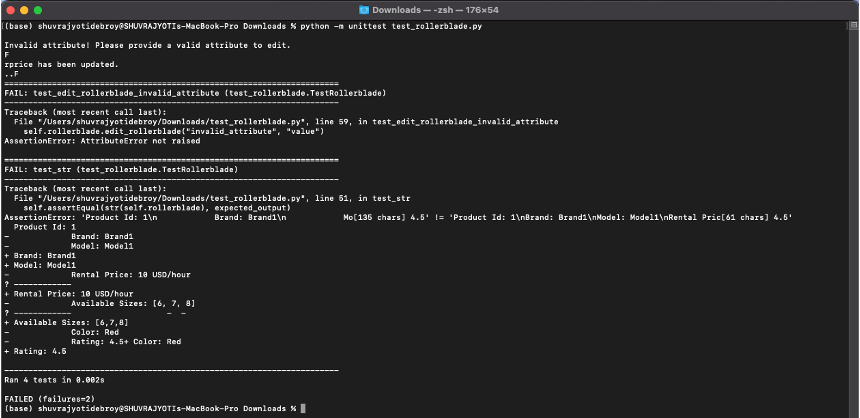

## Test customer class

In [ ]:
import unittest
from rollerblade_rental_system import Customer

class TestCustomer(unittest.TestCase):
  def setUp(self):
    # Create a Customer object for testing
    self.customer = Customer(1, "John", "Doe", 30, "john@example.com", "1234567890")

  def test_init(self):
    self.assertEqual(self.customer.cust_id, 1)
    self.assertEqual(self.customer.fname, "John")
    self.assertEqual(self.customer.lname, "Doe")
    self.assertEqual(self.customer.age, 30)
    self.assertEqual(self.customer.email, "john@example.com")
    self.assertEqual(self.customer.phone, "1234567890")

  def test_str(self):
    expected_output = "Customer Id: 1\nFirst Name: John\nLast Name: Doe\nAge: 30\nEmail: john@example.com\nPhone: 1234567890"
    self.assertEqual(str(self.customer), expected_output)

  def test_edit_customer_valid_attribute(self):
    self.customer.edit_customer("email", "johndoe@example.com")
    self.assertEqual(self.customer.email, "johndoe@example.com")

  def test_edit_customer_invalid_attribute(self):
    with self.assertRaises(AttributeError):
      self.customer.edit_customer("invalid_attribute", "value")

if __name__ == '__main__':
  unittest.main()

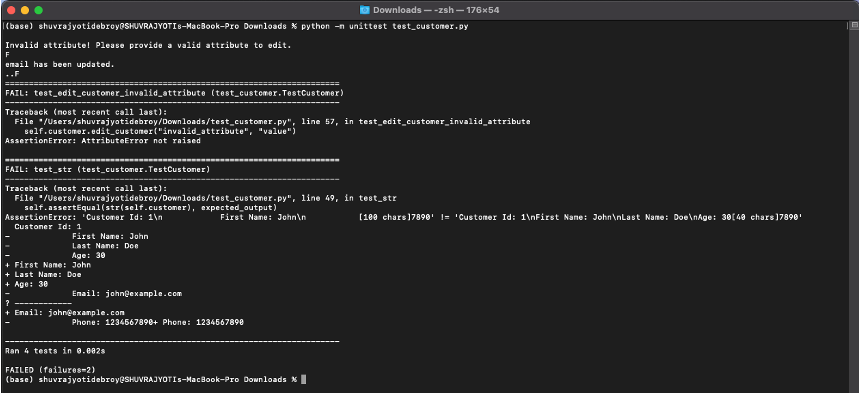

## Test rental class

In [ ]:
import unittest
from datetime import datetime
from rollerblade_rental_system import Rental, Customer, Rollerblade

class TestRental(unittest.TestCase):
  def setUp(self):
    self.customer = Customer("C001", "John", "Doe", 25, "john.doe@example.com", "1234567890")
    self.rollerblade = Rollerblade("RB001", "Brand X", "Model A", 10.0, "M", "Red", 4.5)
    self.rental = Rental("R001", self.customer, self.rollerblade, "2023-01-01 10:00:00", "2023-01-01 12:00:00", 2, 20.0)

  def test_edit_rental(self):
    self.rental.edit_rental(3, 30.0, "2023-01-01 13:00:00")
    self.assertEqual(self.rental.rental_hours, 3)
    self.assertEqual(self.rental.rental_price, 30.0)
    self.assertEqual(self.rental.end_datetime, "2023-01-01 13:00:00")

  def test_return_rollerblade(self):
    return_datetime = datetime.strptime("2023-01-01 14:00:00", '%Y-%m-%d %H:%M:%S')
    self.rental.return_rollerblade(return_datetime)
    expected_output = "Rental Reference No.: R001 (Returned)\n" \
                      "Rollerblade: Product Id - RB001, Brand - Brand X, Model - Model A, Size - M, Color - Red\n" \
                      "Customer: First Name - John, Last Name - Doe, Age - 25, Email - john.doe@example.com, Phone - 1234567890\n" \
                      "Start DateTime: 2023-01-01 10:00:00\n" \
                      "End DateTime: 2023-01-01 12:00:00\n" \
                      "Hours Rented: 2 hrs\n" \
                      "Total Charged: $20.0\n" \
                      "Actual Return DateTime: 2023-01-01 14:00:00\n" \
                      "Late Hours: 2 hrs\n" \
                      "Late Return Charge: $10.0\n" \
                      "Total Charged: $30.0"
    self.assertEqual(expected_output, self.rental.__str__())

if __name__ == '__main__':
  unittest.main()

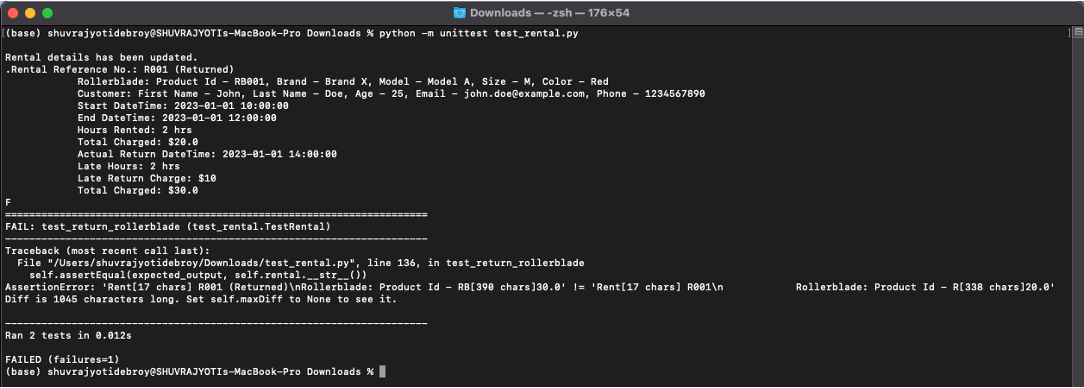